In [41]:
import pandas as pd
import matplotlib.pyplot as plt

ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data = pd.read_csv("raw_data/city_data.csv")

ride_df = pd.DataFrame({
    "Average Fare ($) Per City": round(ride_data.groupby(["city"]).mean()["fare"],2),
    "Total Number of Rides Per City": ride_data.groupby(["city"]).count()["ride_id"]
})

ride_df_reset = ride_df.reset_index()
city_df_reset = city_data.reset_index()

ride_df_reset.head()

,city,Average Fare ($) Per City,Total Number of Rides Per City
0,Alvarezhaven,23.93,31
1,Alyssaberg,20.61,26
2,Anitamouth,37.32,9
3,Antoniomouth,23.62,22
4,Aprilchester,21.98,19


In [42]:
city_data

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [43]:
merged_df = pd.merge(ride_df_reset,city_df_reset,on="city",how="left")
merged_df.head()

,city,Average Fare ($) Per City,Total Number of Rides Per City,index,driver_count,type
0,Alvarezhaven,23.93,31,65,21,Urban
1,Alyssaberg,20.61,26,18,67,Urban
2,Anitamouth,37.32,9,94,16,Suburban
3,Antoniomouth,23.62,22,53,21,Urban
4,Aprilchester,21.98,19,43,49,Urban


In [112]:
urban_x

0      31
1      26
3      22
4      19
5      31
8      29
11     21
12     25
14     22
15     28
20     27
22     19
24     24
28     31
32     19
33     28
35     27
39     25
40     25
41     22
42     21
43     23
44     28
47     21
49     21
50     22
51     28
53     22
55     28
56     25
       ..
77     21
79     27
80     24
81     23
83     23
84     27
85     27
88     27
89     21
94     24
95     32
96     22
98     26
100    30
101    34
104    26
105    23
106    15
108    20
109    30
110    24
111    29
113    21
115    29
118    31
119    18
122    31
123    19
124    20
125    24
Name: Total Number of Rides Per City, Length: 66, dtype: int64

In [114]:
urban_y

0      23.93
1      20.61
3      23.62
4      21.98
5      25.11
8      25.40
11     22.98
12     21.50
14     26.17
15     24.48
20     26.88
22     25.48
24     23.03
28     24.78
32     24.17
33     21.81
35     22.95
39     27.33
40     25.35
41     26.61
42     24.66
43     22.23
44     28.43
47     26.84
49     29.52
50     26.86
51     24.97
53     24.16
55     27.08
56     24.13
       ...  
77     22.33
79     27.05
80     23.35
81     21.33
83     22.49
84     23.11
85     23.49
88     22.79
89     24.60
94     26.82
95     27.09
96     26.03
98     23.68
100    21.61
101    27.46
104    24.21
105    27.22
106    21.47
108    19.52
109    24.16
110    25.44
111    22.33
113    21.07
115    24.28
118    24.88
119    22.37
122    26.99
123    22.68
124    27.21
125    28.30
Name: Average Fare ($) Per City, Length: 66, dtype: float64

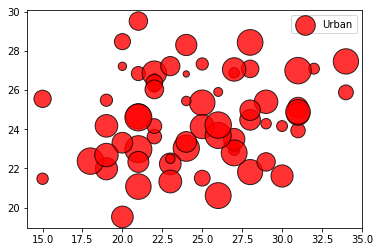

In [118]:
# x-axis = Total Number of Rides (Per City)
# y-axis = Average Fare ($)

# urban - red
urban_x = merged_df.loc[merged_df["type"] == "Urban"]["Total Number of Rides Per City"]
urban_y = merged_df.loc[merged_df["type"] == "Urban"]["Average Fare ($) Per City"]
urban_size = merged_df.loc[merged_df["type"] == "Urban"]["driver_count"]

# # suburban - blue
# suburban_x = merged_df.loc[merged_df["type"] == "Suburban", ["Total Number of Rides Per City"]]
# suburban_y = merged_df.loc[merged_df["type"] == "Suburban", ["Average Fare ($) Per City"]]
# suburban_size = merged_df.loc[merged_df["type"] == "Suburban", ["driver_count"]]


# # rural - yellow
# rural_x = merged_df.loc[merged_df["type"] == "Rural", ["Total Number of Rides Per City"]]
# rural_y = merged_df.loc[merged_df["type"] == "Rural", ["Average Fare ($) Per City"]]
# rural_size = merged_df.loc[merged_df["type"] == "Rural", ["driver_count"]]


# Graph

# plt.figure(figsize=(10,10))

plt.scatter(urban_x,urban_y,label="Urban",s=10*urban_size,c="red",edgecolor="black",alpha=.8)
# plt.scatter(suburban_x,suburban_y,label="Suburban",s=suburban_size,c="blue")
# plt.scatter(rural_x,rural_y,label="Rural",s=rural_size,c="yellow")

# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare($)")
plt.legend(loc="best")
# plt.grid()



plt.show()